# Project 4, APS1070 Winter 2022
#### **Linear Regression -  14 points**
**Deadline: April 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Haocheng Wei
*   Your **student number**: 1008498261



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



In [ ]:
%%shell
jupyter nbconvert --to html /content/W22_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/W22_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 881992 bytes to /content/W22_APS1070_Project_4.html


## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import time
import pandas as pd
import numpy as np
import scipy
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import gen_batches
import matplotlib.pyplot as plt

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [2]:
# 1 print the dataframe 
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
# Splitting
x = df.iloc[:,0:-1]
y = df['Goal']

val_ratio=0.15
test_ratio=0.15

x_train_raw, x_test_raw, y_train, y_test = train_test_split(  # split train / test
    x, y, test_size=test_ratio+val_ratio, random_state=1)

x_test_raw, x_val_raw, y_test, y_val = train_test_split(  # split train / val
    x_test_raw, y_test, test_size=val_ratio/(val_ratio + test_ratio), random_state=1)

print(x_train_raw.shape, y_train.shape, x_val_raw.shape, 
      y_val.shape, x_test_raw.shape, y_test.shape)

(9625, 40) (9625,) (2063, 40) (2063,) (2062, 40) (2062,)


In [4]:
# Scaling 
scaler = StandardScaler().fit(x_train_raw)    # fitting the scaler using training data
x_train = scaler.transform(x_train_raw)
x_val = scaler.transform(x_val_raw)
x_test = scaler.transform(x_test_raw)
print(x_train.mean(), x_val.mean(), x_test.mean())

-1.0564017193482632e-16 -0.0009059481248178899 0.000759602917996003


In [5]:
# insert 1s
def insertOnes(x):
    if len(set(x.T[0])) == 1:
        print('already inserted col of 1s')
        return x
    return np.hstack((np.ones((x.shape[0], 1)), x))

x_train = insertOnes(x_train)
x_val = insertOnes(x_val)
x_test = insertOnes(x_test)
print(x_train.shape, x_val.shape, x_test.shape)

(9625, 41) (2063, 41) (2062, 41)


3. the difference between epoch and iteration:
    * epoch: your model traverse through the whole dataset (training set) 1 time is called 1 epoch.
    * iteration: your model traverse through 1 batch of the data (training data) is called 1 iteration. 
    * Typically, epoch >> iteration.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [6]:
def rmse(y0, yp):
    return np.sqrt(mean_squared_error(y0, yp))

def directWeight(data, label):
    return np.dot(inv(np.dot(data.T, data)), 
                  np.dot(data.T, label))
    
w = directWeight(x_train, y_train)

yp_train = np.dot(x_train, w)
rmse_train_d = rmse(y_train, yp_train)  # get training rmse

yp_val = np.dot(x_val, w)
rmse_val_d = rmse(y_val, yp_val)  # get validation rmse

print('     Train RMSE:  {}\nValidation RMSE:  {}'.format(rmse_train_d, rmse_val_d))

     Train RMSE:  0.00017576727439705007
Validation RMSE:  0.00016692245170550488


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

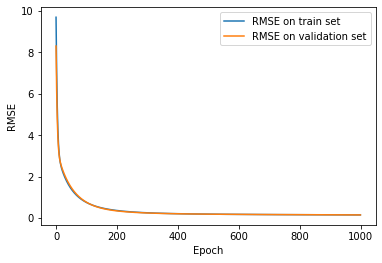

--- Total Training Time: 11.499105453491211 (s) ---


In [7]:
start_time = time.time() ## Records current time

lr = .01                    # learning rate
CT = rmse_val_d * 1.001     # converge threshold
rmse_train, rmse_val = [], []

# initial weight, noticed that different initial weight can largely affect rmse curve in the beginning
w = np.random.random(x_train.shape[1]).reshape(-1, x_train.shape[1])
# w = np.zeros(x_train.shape[1]).reshape(-1, x_train.shape[1])
# w = np.ones(x_train.shape[1]).reshape(-1, x_train.shape[1])

for epoch in range(0, 1000):
    yp = np.dot(x_train, w.T).squeeze()
    rmse_train.append(rmse(y_train, yp))

    gradient = (np.dot(x_train.T, yp - y_train) / len(yp))
    w = w - lr * gradient # weight update

    yp_val = np.dot(x_val, w.T)
    rmse_val.append(rmse(y_val, yp_val))

    if rmse(y_val, yp_val) <= CT:
        break  # check convergency

plt.plot(rmse_train, label='RMSE on train set')
plt.plot(rmse_val, label='RMSE on validation set')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [8]:
def isTraining(rmse, ct, max_epoch, showlog):
    ''' terminate the loop upon converges or diverges or max epoch reaches
    '''
    if len(rmse) <= 1:
        return True   # epoch 0 ~ 1
    elif rmse[-1] <= ct:
        if showlog:
            print('  Stop Training : Converges  ')
        return False  # converges
    elif rmse[-1] > rmse[-2]:
        if showlog:
            print('  Stop Training : Diverges  ')
        return False  # diverges
    elif len(rmse) > max_epoch:
        if showlog:
            print('  Stop Training : Max Epoch Reached  ')
        return False
    else:
        return True   # training


def minibatch_gd(x, y, x_val, y_val, ct=0.000166, bs=64, lr=0.01, seed=42, showlog=True, max_epoch=100):
    ''' the main function
    '''
    start_time = time.time()
    weight, rmse_train, rmse_val, elapsed_time = [], [], [], []

    np.random.seed(seed)
    w = np.random.random(x.shape[1]) / 1000   # initial weight

    while isTraining(rmse_val, ct, max_epoch, showlog):  # epoch
        # train
        for i, batch in enumerate(gen_batches(x.shape[0], bs)):  # iter
            ypb = np.dot(x[batch], w.T).squeeze()
            gradient = np.dot(x[batch].T, ypb - y[batch]) / len(ypb)
            w = w - lr * gradient
            # if i == 0 and rmse_val == []:
            #     print(x[batch].shape, w.T.shape, ypb.shape, gradient.shape)
        
        # predict
        yp = np.dot(x, w.T)
        yp_val = np.dot(x_val, w.T)

        # save logs
        weight.append(w)
        rmse_train.append(rmse(yp, y))
        rmse_val.append(rmse(yp_val, y_val))
        elapsed_time.append(time.time() - start_time)
        
        # permutation
        permutation = np.random.permutation(x.shape[0])
        x, y = x[permutation], y[permutation]

    return [weight[-1], rmse_train, rmse_val, elapsed_time]

res = minibatch_gd(x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), ct=0.000166, bs=256, seed=10)

  Stop Training : Diverges  


In [9]:
bs_list = [32, 64, 128, 256, 512, 1024, 2048, 4096]
res = []
for bs in bs_list:
    res.append(minibatch_gd(x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), bs=bs, ct=1.001 * 0.000167, seed=17373331))

  Stop Training : Diverges  
  Stop Training : Diverges  
  Stop Training : Diverges  
  Stop Training : Diverges  
  Stop Training : Diverges  
  Stop Training : Max Epoch Reached  
  Stop Training : Max Epoch Reached  
  Stop Training : Max Epoch Reached  


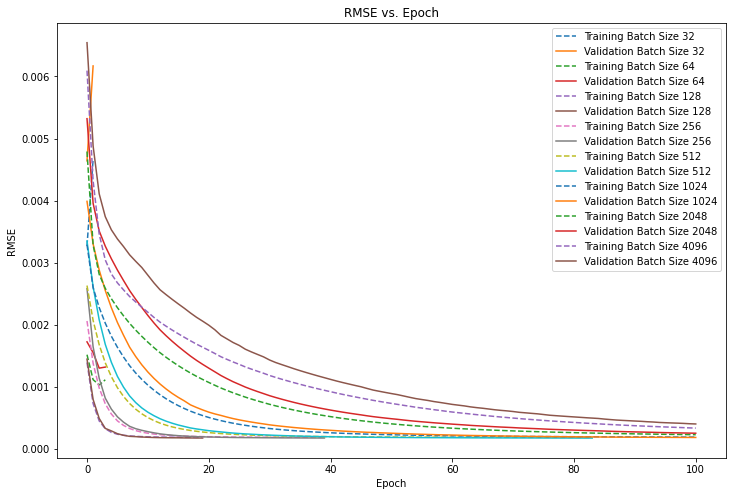

In [10]:
plt.figure(figsize=(12, 8))
plt.title('RMSE vs. Epoch')
for i in range(len(res)):
    plt.plot(res[i][1], label = 'Training Batch Size {}'.format(bs_list[i]), linestyle = 'dashed') 
    plt.plot(res[i][2], label = 'Validation Batch Size {}'.format(bs_list[i])) 

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

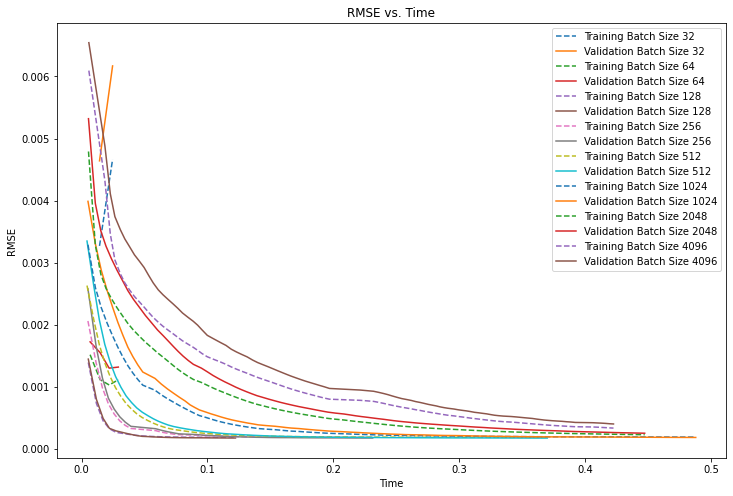

In [11]:
plt.figure(figsize=(12, 8))
plt.title('RMSE vs. Time')
for i in range(len(res)):
    plt.plot(res[i][3], res[i][1], label = 'Training Batch Size {}'.format(bs_list[i]), linestyle = 'dashed') 
    plt.plot(res[i][3], res[i][2], label = 'Validation Batch Size {}'.format(bs_list[i])) 

plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()

Text(0, 0.5, 'Time')

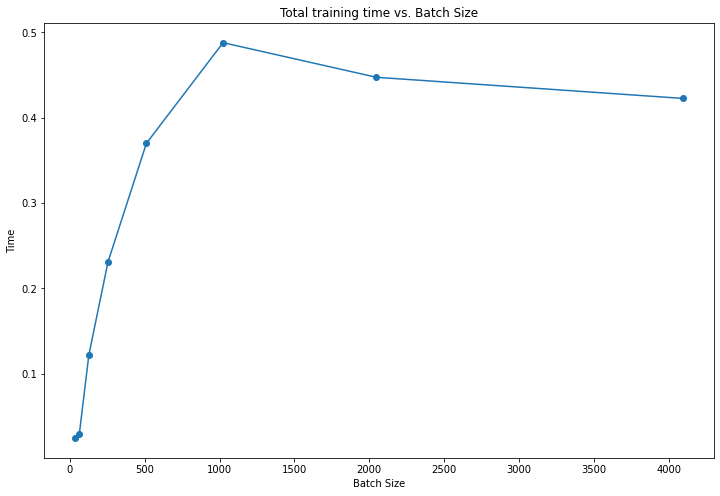

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Total training time vs. Batch Size')
plt.plot(bs_list, [i[3][-1] for i in res])
plt.scatter(bs_list, [i[3][-1] for i in res])
plt.xlabel('Batch Size')
plt.ylabel('Time')

### Analysis:

In this part, I set up a hyperparam called max_epoch, to prevent the training process from looping infinitely.

1. Convergence and divergence

    Under my hyperparam, which is $max\_epoch=100, seed=17373331, w_{init}$ is random sample between (0, 1e-3). All of whose batch size < 512 is considered not converge by breaking the monotonicity of RMSE curve. When batch size > 512, converge is observed while some of the models reached the max epoch.

2. RMSE vs. Epoch

    We could see that the model will converge slower as the batch size increases. Which proved that mini-batch gradient descent is helpful on speeding up the process of gradient descent. However, some of them appears to be diverged, which can be find in the plot that the training process terminated very early. A batch size of 512 or 1024 is generally good.

3. RMSE vs. time

    This plot is similar to the RMSE vs. Epoch plot. However, since all models with batch_size > 512 is terminated at max_epoch = 100, the larger batch size cost the less time finish training.

4. Total training time vs. batch size

    This plot demonstrate what we mention in 3 that, when the total number of epochs is same, the larger batch size cost the less time finish training. But if we set max_epoch=inf, the training time will rise monotonically with the batch size.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [14]:
def isConverged(res):
    if res == []:     # train No.0
        return False  # Keep training
    elif len(res[2]) < 2:
        return False
    elif res[2][-1] > res[2][-2]: # Still diverge
        return False  # Keep training
    return True

list_bs = [64, 128, 256]  # diverge at lr=.01
allres = []
for bs in list_bs:
    lr = 0.01
    res = []
    while not isConverged(res):  # pass in rmse of validation
        lr = 0.9 * lr
        res = minibatch_gd(x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), 
                           bs=bs, ct=1.001 * 0.000167, lr=lr, max_epoch=200,
                           seed=17373331, showlog=False)  # run training
    res.append(lr)
    allres.append(res)

allres = pd.DataFrame(data={
    'batch size': list_bs,
    'learning rate': [i[4] for i in allres],
    'training RMSE': [i[1][-1] for i in allres],
    'validation RMSE': [i[2][-1] for i in allres]
})
allres

,batch size,learning rate,training RMSE,validation RMSE
0,64,0.000471,0.000189,0.000180
1,128,0.000886,0.000190,0.000181
2,256,0.001853,0.000189,0.000180


In [15]:
list_lr = [0.02, 0.0175, 0.015, 0.0125, 0.01, 0.008, 0.006, 0.004, 0.002, 0.001]
allres = []
for lr in list_lr:
    res = minibatch_gd(x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), 
                        bs=1024, ct=1.001 * 0.000167, lr=lr, max_epoch=400,
                        seed=17373331, showlog=False)  # run training
    allres.append(res)

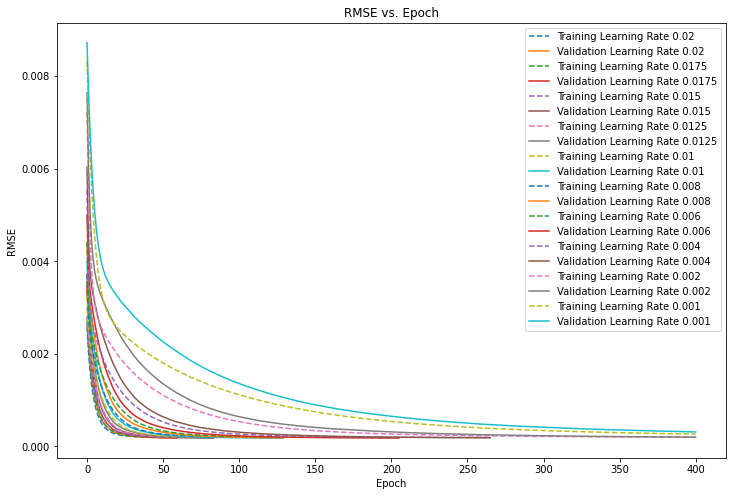

In [16]:
plt.figure(figsize=(12, 8))
plt.title('RMSE vs. Epoch')
for i in range(len(list_lr)):
    plt.plot(allres[i][1], label = 'Training Learning Rate {}'.format(list_lr[i]), linestyle = 'dashed') 
    plt.plot(allres[i][2], label = 'Validation Learning Rate {}'.format(list_lr[i])) 

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

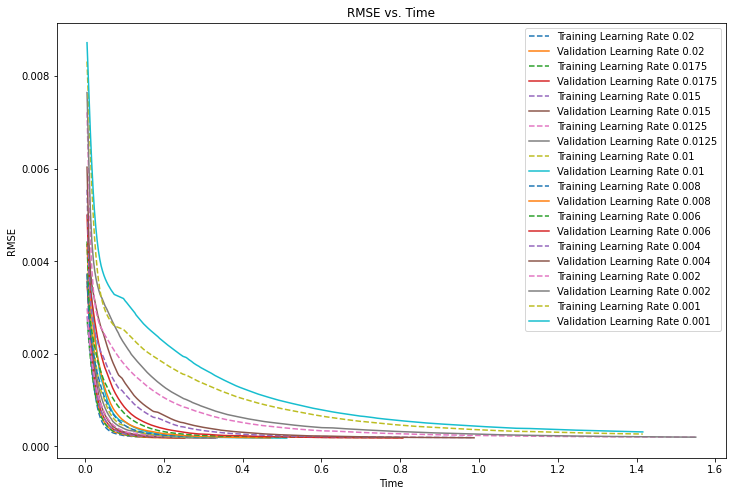

In [17]:
plt.figure(figsize=(12, 8))
plt.title('RMSE vs. Time')
for i in range(len(list_lr)):
    plt.plot(allres[i][3], allres[i][1], label = 'Training Learning Rate {}'.format(list_lr[i]), linestyle = 'dashed') 
    plt.plot(allres[i][3], allres[i][2], label = 'Validation Learning Rate {}'.format(list_lr[i])) 

plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()

### Analysis
1. Converge learning rate for different batch size

    From this table we can see that the smaller batch size require smaller learning rate to prevent being diverged. Their relation is almost linear.

2. RMSE vs. Epoch at different learning rate

    From this part we can see that a larger learning rate will result in a faster training process but less stability. The gradient drops very quick as the learning rate > 0.006

3. RMSE vs. Time at different learning rate

    The graph is similar to the graph in 2. Just with some slight noise near 0.2s. Generally, the less epoch the model has gone through, the less time it costs, and the smaller learning rate leads to slower convergence and more time it takes.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [13]:
# select model hyperparams
batch_size = 1024
learning_rate = 0.008
ct = 0

res = minibatch_gd(x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), 
                    bs=batch_size, ct=ct, lr=learning_rate, max_epoch=200,
                    seed=17373331, showlog=False)  # run training
weight = res[0]
yp_test = np.dot(x_test, weight)
score = rmse(yp_test, y_test)
print(score)

0.00018781702681158792


### Model selection and result
    
The hyperparams of the model chosen are: $batch\_size=1024, learning\_rate=0.008$, whose test RMSE is 1.88e-4.

### Summarize

The selected model has the advantage of fast-training, robust to divengence, and good performance on testing set. The selected model is competent of performing the task of managing ailerons of an aircraft.

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/5dxrAjOj to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-ephemer1s
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-ephemer1s
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link :** ------------------- `https://github.com/APS-1070-2021/project4_git-ephemer1s` ---------------- **[3 marks]**